# Estudos sobre correlação e Regressão

- Correlação: Correspondência entre variáveis.
- Regressão: Previsões para o futuro.
- Covariância, correlação e determinação - Cálculos passo a passo e implementação
- Regressão linear simples e múltipla
- Métricas de Erro: Avaliação de modelos de regressão.

# Covariância, correlação e determinação

- Usamos os cálculos para medir a relação matemática entre duas variáveis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import math
import matplotlib.pyplot as plt

# Base de Dados

In [2]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
dataset = pd.DataFrame({'Tamanho': tamanho, 'Preço':preco})
dataset.head()

,Tamanho,Preço
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
media_tamanho = dataset['Tamanho'].mean()
media_preco = dataset['Preço'].mean()

media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
dp_tamanho = dataset['Tamanho'].std()
dp_preco = dataset['Preço'].std()

dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Cálculo Manual - Correlação

In [6]:
dataset['Dif'] = (dataset['Tamanho'] - media_tamanho) * (dataset['Preço'] - media_preco)
dataset

,Tamanho,Preço,Dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
soma_dif = dataset['Dif'].sum()
soma_dif

535500.0

Cálculo Covariância:

In [8]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [9]:
# > 0 Variáveis se movem juntas
# < 0 Variáveis se movem em direções opostas
# = 0 Variáveis são independentes

Cálculo - Coeficiente de correlação:

In [10]:
coef_correlacao = covariancia / (dp_tamanho * dp_preco)
coef_correlacao

0.9962006267707775

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tamanho', ylabel='Preço'>

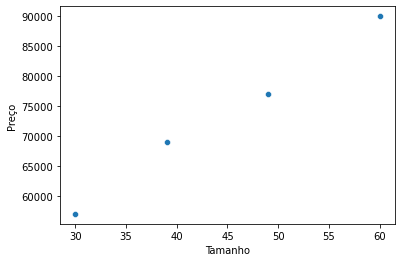

In [11]:
sns.scatterplot(dataset['Tamanho'], dataset['Preço'])

In [12]:
coeficiente_determinacao = math.pow(coef_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Correlação - Via numpy e pandas

In [13]:
np.cov(dataset['Tamanho'], dataset['Preço'])

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [14]:
dataset.cov()

,Tamanho,Preço,Dif
Tamanho,167.0,178500.0,1.850000e+05
Preço,178500.0,192250000.0,1.612500e+08
Dif,185000.0,161250000.0,1.735512e+10


In [15]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [16]:
dataset.corr()

,Tamanho,Preço,Dif
Tamanho,1.000000,0.996201,0.108667
Preço,0.996201,1.000000,0.088278
Dif,0.108667,0.088278,1.000000


# Exercicio - House Price

In [17]:
datahouse = pd.read_csv("house_prices.csv")
datahouse

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
datahouse.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [19]:
datahouse.drop(['id', 'date', 'sqft_living', 'sqft_lot'], axis=1, inplace=True)

In [20]:
datahouse.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
datahouse.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

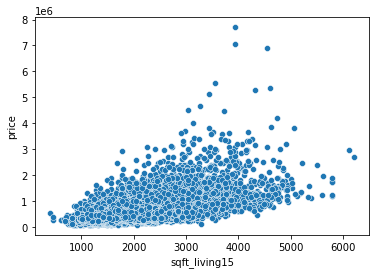

In [22]:
sns.scatterplot(datahouse['sqft_living15'], datahouse['price'])

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

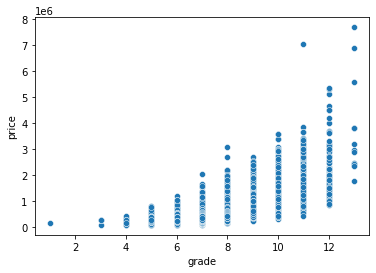

In [23]:
sns.scatterplot(datahouse['grade'], datahouse['price'])

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='price'>

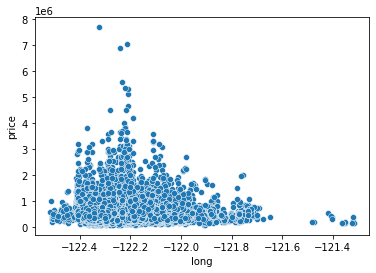

In [24]:
sns.scatterplot(datahouse['long'], datahouse['price'])

<AxesSubplot:>

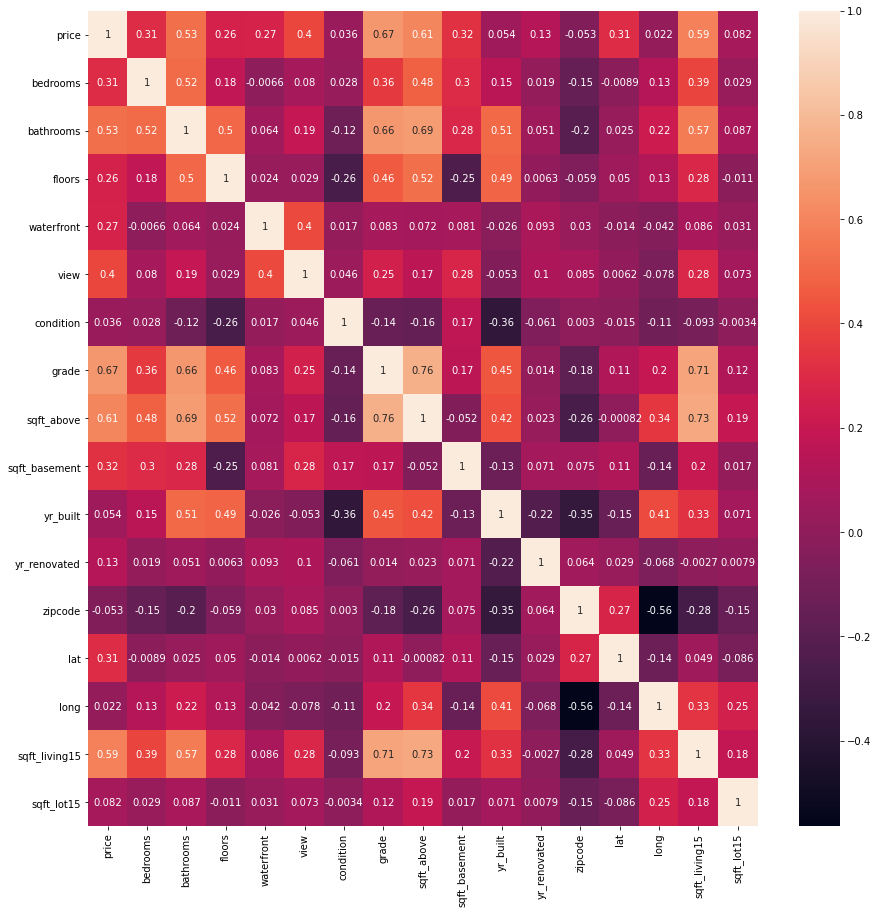

In [25]:
plt.figure(figsize=(15,15))

sns.heatmap(datahouse.corr(), annot=True)

# Correlação com a biblioteca Yellowbrick 

A biblioteca é muito boa para visualizar gráficos de modelos de machine learning.

In [26]:
!pip install yellowbrick --upgrade

In [27]:
from yellowbrick.target import FeatureCorrelation

In [28]:
datahouse.columns[1:]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

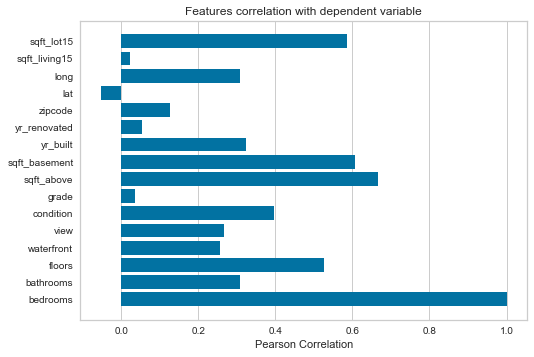

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [29]:
grafico = FeatureCorrelation(labels = datahouse.columns[1:])
grafico.fit(datahouse.iloc[:, 0:16].values, datahouse.iloc[:,0].values)
grafico.show()

# Introdução a Regressão Linear - Simples

In [30]:
# característica da regressão linear:
# y = b0 + b1*x

In [31]:
datahouse.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

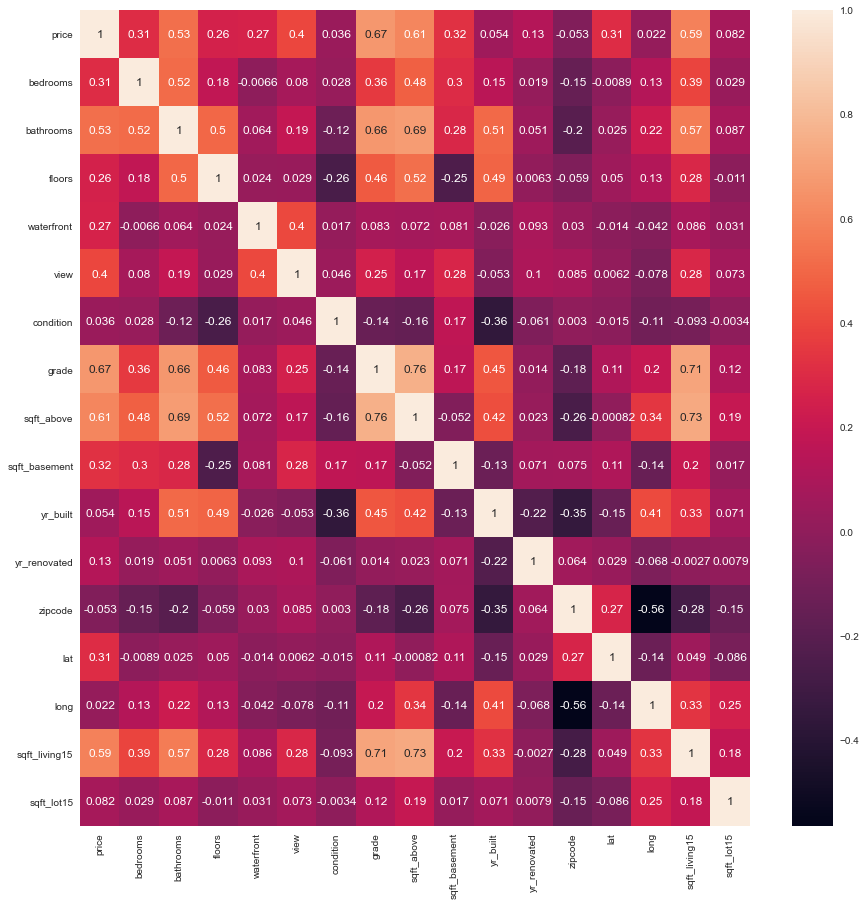

In [32]:
plt.figure(figsize=(15,15))

sns.heatmap(datahouse.corr(), annot=True)

In [33]:
math.pow(0.7, 2)

0.48999999999999994

In [34]:
datahouse.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [35]:
X = datahouse['sqft_living15'].values
X.shape

(21613,)

In [36]:
# Para o modelo de regressão vamos precisar transformar para o formato de matriz
X = X.reshape(-1,1)
X.shape

(21613, 1)

In [37]:
y = datahouse['price'].values
y.shape

(21613,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
# b0 
regressor.intercept_

-65779.26771579555

In [41]:
# b1
regressor.coef_

array([304.24389402])

In [42]:
# Logo: y = -65779.26771579555 + 304.24389402*x
regressor.intercept_ + regressor.coef_ * 770

array([168488.53068107])

In [43]:
# avaliando outros valores:
regressor.intercept_ + regressor.coef_ * 500

array([86342.67929515])

In [44]:
# avaliando outros valores:
regressor.intercept_ + regressor.coef_ * 900

array([208040.23690391])

In [45]:
# outro modo
regressor.predict(np.array([[900]]))

array([208040.23690391])

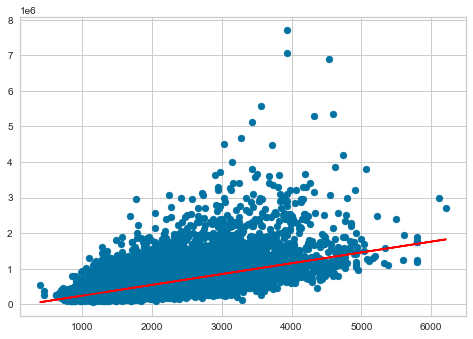

In [46]:
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color='red')

In [47]:
# R2 na base de dados de treinamento
regressor.score(X_train, y_train)

0.3432128000738559

In [48]:
# R2 na base de dados de teste
regressor.score(X_test, y_test)

0.3394744126244147

# Métricas e erros

Avaliando resultados de algoritmos de regressão:
- Mean Absolute Error (MAE): Calcula a diferença absolutas entre as previsões e os valores reais; 
- Mean Squared Error (MSE): Diferença elevadas ao quadrado (erros penalizados) >> sofre com os erros se a previsão tiver muita diferença ao valor real;
- Root Mean Squared Error (RMSE): Interpretação facilitada;

Objetivo é ter um valor menor de erro. Quanto menor o valor do erro, menor a diferença dos valores previstos para os reais. 

In [49]:
previsoes = regressor.predict(X_test)

In [50]:
previsoes, y_test

(array([ 816528.02494771,  427095.84059968, 1108602.16320873, ...,
         494029.4972845 , 1014286.55606194,  487944.61940406]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
mean_absolute_error(y_test, previsoes)

190622.04850436817

Logo, toda vez que fazemos uma previsão vamos ter um erro médio de aproximadamente 190622 para cima ou para baixo. O ideal é ter um valor mais próximo a zero, para ter poucas variações.

In [53]:
mean_squared_error(y_test, previsoes)

114007357796.49193

Muito complicado de interpretar, pois ele penaliza as previsões com muita diferença em relação ao valor real. 

In [54]:
math.sqrt(mean_squared_error(y_test, previsoes))

337649.75610311335

Diferença entre os preços reais e as previsões.

# Regressão Linear Multipla

In [55]:
datahouse.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
X = datahouse.iloc[: , [2, 7, 8, 15]].values
X

array([[1.00e+00, 7.00e+00, 1.18e+03, 1.34e+03],
       [2.25e+00, 7.00e+00, 2.17e+03, 1.69e+03],
       [1.00e+00, 6.00e+00, 7.70e+02, 2.72e+03],
       ...,
       [7.50e-01, 7.00e+00, 1.02e+03, 1.02e+03],
       [2.50e+00, 8.00e+00, 1.60e+03, 1.41e+03],
       [7.50e-01, 7.00e+00, 1.02e+03, 1.02e+03]])

In [60]:
y = datahouse.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
regressor.score(X_test, y_test)

0.475898660606237

In [67]:
previsoes = regressor.predict(X_test)
mean_absolute_error(y_test, previsoes)

173501.72172664985

In [68]:
mean_squared_error(y_test, previsoes)

90460400117.56544

(array([2., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([   3. ,  138.7,  274.4,  410.1,  545.8,  681.5,  817.2,  952.9,
        1088.6, 1224.3, 1360. ]),
 <BarContainer object of 10 artists>)

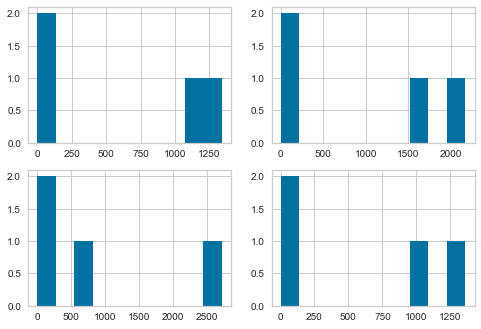

In [70]:
f, ax = plt.subplots(2, 2)
ax[0,0].hist(X[0])
ax[0,1].hist(X[1])
ax[1,0].hist(X[2])
ax[1,1].hist(X[3])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

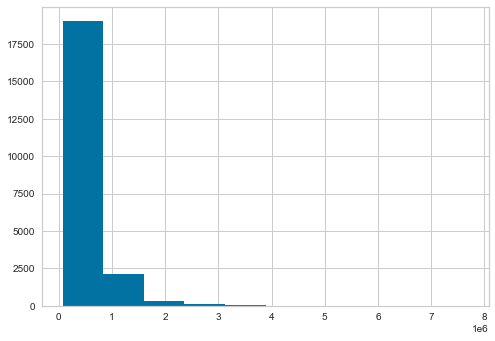

In [71]:
plt.hist(y)

In [72]:
y = np.log(y)

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <BarContainer object of 10 artists>)

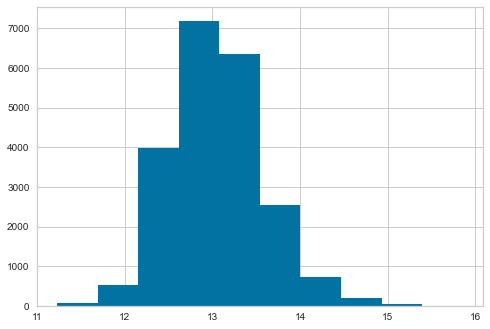

In [73]:
plt.hist(y)

Transformando para uma transformação normal

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [75]:
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
regressor.score(X_test, y_test)

0.5522868246504649

# Aplicando para todos os atributos

In [84]:
datahouse

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [82]:
X = datahouse.drop('price', axis=1)
y = datahouse['price']

In [83]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [85]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
regressor.fit(X_train, y_train)

LinearRegression()

In [88]:
regressor.score(X_test, y_test)

0.6858516800740675

# Feature Selection 

In [89]:
from sklearn.feature_selection import SelectFdr, f_regression

In [92]:
selecao = SelectFdr(f_regression, alpha=0.0)

X_novo = selecao.fit_transform(X,y)
X.shape, X_novo.shape

((21613, 16), (21613, 9))

É aplicado o teste de hipóteses para selecionar o melhor atributo. 

Nesse caso, utilizamos o f_regression

In [93]:
colunas = selecao.get_support()
colunas 

array([ True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False,  True, False])

Colunas selecionadas

In [96]:
datahouse.columns[1:17][colunas==True]

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_novo, y, test_size=0.2, random_state=1)

In [98]:
regressor.fit(X_train, y_train)

LinearRegression()

In [102]:
regressor.score(X_test,y_test)

0.6444206541785428